<p style="font-family: Candara; line-height: 2; font-size: 31px; font-weight: bold; letter-spacing: 1px; text-align: center; color: #01796F">Task 3- Geospatial Analysis</p>

<hr style="height: 0.5px; border: 0; background-color: #342D7E">

<p style="font-family: Candara; font-size: 25px; font-style: normal; font-weight: bold; letter-spacing: 3px; text-align: left; color: #01796F; line-height:1.0">TABLE OF CONTENT</p>

<p style="font-family: Candara; font-size: 15px; font-style: normal; font-weight: bold; letter-spacing: 2px; text-align: left; color:  #342D7E; line-height:1"><a href="#part1" style="color:#01796F">1. INTRODUCTION</a></p>

<p style="font-family: Candara; font-size: 15px; font-style: normal; font-weight: bold; letter-spacing: 2px; text-align: left; color: #01796F; line-height:1"><a href="#part2" style="color:#01796F">2. LIBRARIES</a></p>

<p style="font-family: Candara; font-size: 15px; font-style: normal; font-weight: bold; letter-spacing: 2px; text-align: left; color: #01796F; line-height:1"><a href="#part3" style="color:#01796F">3. IMPORT DATA </a></p>

<p style="font-family: Candara; font-size: 15px; font-style: normal; font-weight: bold; letter-spacing: 2px; text-align: left; color: #01796F; line-height:1"><a href="#part4" style="color:#01796F">4. EXPLORATORY DATA ANALYSIS </a></p>

<p style="font-family: Candara; font-size: 15px; font-style: normal; font-weight: bold; letter-spacing: 2px; text-align: left; color: #01796F; line-height:1"><a href="#part5" style="color:#01796F">5. SPATIAL ANALYSIS</a></p>

<p style="font-family: Candara; font-size: 15px; font-style: normal; font-weight: bold; letter-spacing: 2px; text-align: left; color: #01796F; line-height:1"><a href="#part5" style="color:#01796F">6. REPORT</a></p>

<p style="font-family: Candara; font-size: 15px; font-style: normal; font-weight: bold; letter-spacing: 2px; text-align: left; color: #01796F; line-height:1"><a href="#part5" style="color:#01796F">7. CONCLUSION</a></p>

<p style="font-family: Candara; font-size: 15px; font-style: normal; font-weight: bold; letter-spacing: 2px; text-align: left; color: #01796F; line-height:1"><a href="#part5" style="color:#01796F">8. FUTURE DIRECTION</a></p>

<p style="font-family: Candara; font-size: 15px; font-style: normal; font-weight: bold; letter-spacing: 2px; text-align: left; color: #01796F; line-height:1"><a href="#part5" style="color:#01796F">9. REFERENCES</a></p>


<a class="anchor" id="part1"></a>
# <span style="font-family: candara; font-size: 25px; font-style: normal; font-weight: bold; letter-spacing: 3px; text-align: center; color:  #01796F; line-height:1.0">1. Introduction To Geospatial Analysis </span>

<a class="anchor" id="part1"></a>

<hr style="height: 0.5px; border: 0; background-color: #342D7E">

Geospatial analysis allows for the examination of spatial relationships, patterns, and trends that might not be apparent through traditional data analysis methods. It helps organizations and researchers make informed decisions, solve complex spatial problems, and gain a deeper understanding of the world around us.

Geographic Information Systems (GIS) software, including tools like ArcGIS, QGIS, and GeoPandas, are commonly used for geospatial analysis. These systems provide a range of capabilities for managing, analyzing, and visualizing spatial data.

<a class="anchor" id="part2"></a>
# <span style="font-family: candara; font-size: 25px; font-style: normal; font-weight: bold; letter-spacing: 3px; text-align: center; color:  #01796F; line-height:1.0">2. Import necessary libraries </span>


<hr style="height: 0.5px; border: 0; background-color: #342D7E">

In [1]:
# Import necessary libraries
import geopandas as gpd
import io, requests , fiona

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


<a class="anchor" id="part3"></a>
# <span style="font-family: candara; font-size: 25px; font-style: normal; font-weight: bold; letter-spacing: 3px; text-align: center; color:  #01796F; line-height:1.0">3. Import Data </span>

<hr style="height: 0.5px; border: 0; background-color: #342D7E"> 

In [2]:
"""
This code reads a JSON or GeoJSON file from a link and returns a DataFrame 
(assuming you have pandas, geopandas, fiona and requests installed)

"""

def get_df(link):
    """
    Inputs a link to a JSON/GeoJSON file and returns a DataFrame
    """
    try:
        # Try reading the file directly
        return gpd.read_file(link)
    except Exception as e:
        print(f"Error: {e}")
        print("Retrieving the DataFrame from the URL.")

        try:
            # Retrieve data from the URL
            req = requests.get(link).content
            # Read the content as a GeoDataFrame
            return gpd.read_file(io.StringIO(req.decode('utf-8')))
        except Exception as e:
            print(f"Failed to retrieve data from the URL: {e}")
            return pd.DataFrame()

In [3]:
df_bio = get_df(r"C:\O\Outreachy_Siziwe_2023\CI_BiodiversityHotspots.geojson")

In [4]:
# display the dataset
df_bio.head(1)

,OBJECTID,NAME,Type,Shape_Length,Shape_Area,geometry
0,1,Chilean Winter Rainfall and Valdivian Forests,hotspot area,200.706891,40.754665,"MULTIPOLYGON (((-74.59792 -46.92502, -74.61111..."


In [5]:
df_bio.shape

(53, 6)

<a class="anchor" id="part5"></a>
# <span style="font-family: candara; font-size: 25px; font-style: normal; font-weight: bold; letter-spacing: 3px; text-align: center; color:  #01796F; line-height:1.0">4.EXPLORATORY DATA ANALYSIS </span>

<hr style="height: 0.5px; border: 0; background-color: #342D7E"> 

In [6]:
#Import 

In [7]:
#import the south african boundary data first
df_sa_bound = get_df(r"C:\O\Outreachy_Siziwe_2023\ZAF_AL2_South_Africa.json")
# Extract South Africa's biodiversity hotspots
df_sa_bio = df_bio.clip(df_sa_bound)
df_sa_bio = df_sa_bio.reset_index(drop=True)
df_sa_bio.head()

,OBJECTID,NAME,Type,Shape_Length,Shape_Area,geometry
0,3,Cape Floristic Region,hotspot area,93.790123,7.610383,"MULTIPOLYGON (((23.08365 -34.08177, 23.07374 -..."
1,8,Succulent Karoo,hotspot area,79.117896,9.648439,"MULTIPOLYGON (((19.94741 -33.85329, 19.95347 -..."
2,4,Maputaland-Pondoland-Albany,hotspot area,49.631419,25.366584,"MULTIPOLYGON (((24.38414 -34.10260, 24.37800 -..."


In [9]:
gdf = gpd.GeoDataFrame(df_sa_bio, geometry='geometry')

# Explore the dataset
print(gdf.head())
print(gdf.crs)  # Coordinate reference system

   OBJECTID                         NAME          Type  Shape_Length  \
0         3        Cape Floristic Region  hotspot area     93.790123   
1         8              Succulent Karoo  hotspot area     79.117896   
2         4  Maputaland-Pondoland-Albany  hotspot area     49.631419   

   Shape_Area                                           geometry  
0    7.610383  MULTIPOLYGON (((23.08365 -34.08177, 23.07374 -...  
1    9.648439  MULTIPOLYGON (((19.94741 -33.85329, 19.95347 -...  
2   25.366584  MULTIPOLYGON (((24.38414 -34.10260, 24.37800 -...  
EPSG:4326


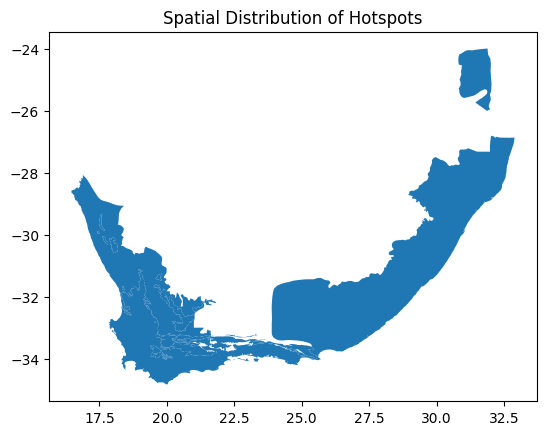

In [10]:
# Create a map of the hotspots
gdf.plot()
plt.title("Spatial Distribution of All Hotspots In South Africa")
plt.show()

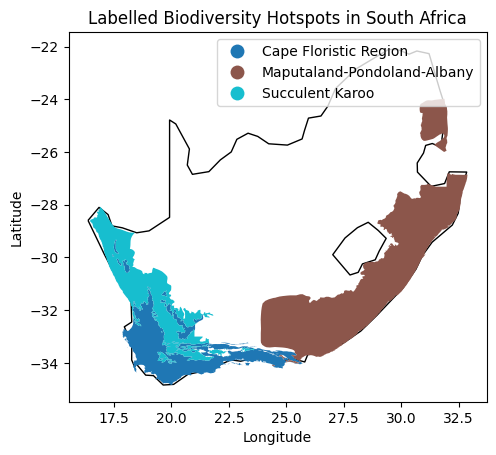

In [12]:
# Create a base map of South Africa
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
south_africa = world[world['name'] == 'South Africa']
ax = south_africa.plot(color='white', edgecolor='black')

# Plot the biodiversity hotspots
df_sa_bio.plot(ax=ax, column='NAME', legend=True)

# Set plot title and labels
plt.title("Labelled Biodiversity Hotspots in South Africa")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()

<a class="anchor" id="part5"></a>
# <span style="font-family: candara; font-size: 25px; font-style: normal; font-weight: bold; letter-spacing: 3px; text-align: center; color:  #01796F; line-height:1.0">5.Spatial Analysis </span>

<hr style="height: 0.5px; border: 0; background-color: #342D7E"> 

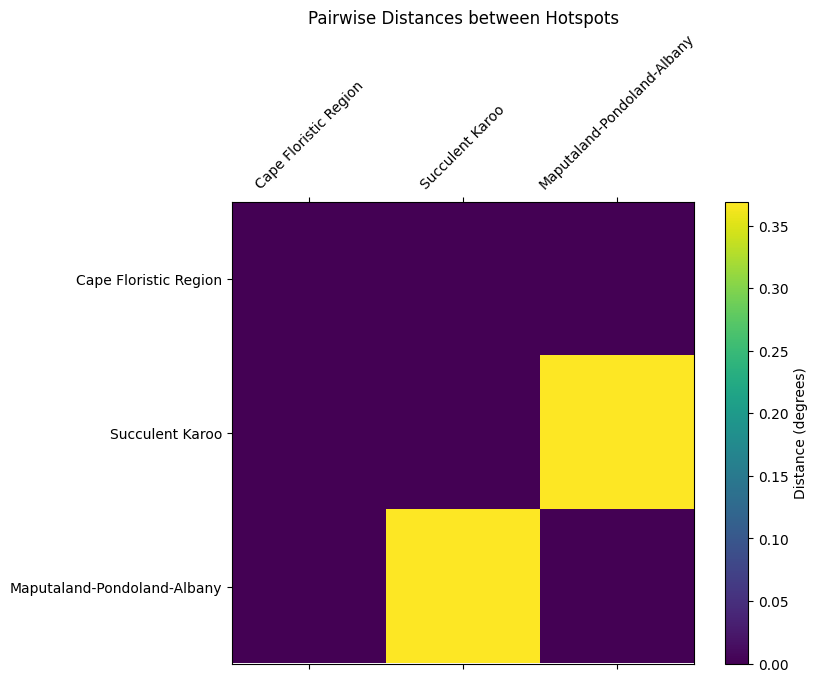

In [16]:
# Create a GeoDataFrame for hotspots
gdf_hotspots = gpd.GeoDataFrame(df_sa_bio, geometry='geometry')

# Calculate the pairwise distances between hotspots
distances = gdf_hotspots.geometry.apply(lambda x: gdf_hotspots.geometry.distance(x))
# Exclude self-distances by replacing them with NaN
distances = distances.where(~distances.isna(), other=0.0)

# Visualize the distances
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(distances, cmap='viridis')
fig.colorbar(cax, label='Distance (degrees)')
plt.title("Pairwise Distances between Hotspots")
plt.xticks(range(len(gdf_hotspots)), gdf_hotspots.NAME, rotation=45)
plt.yticks(range(len(gdf_hotspots)), gdf_hotspots.NAME)
plt.show()

From the spatial analysis conducted, we can make several observations:

- Pairwise Distance Calculation: The analysis calculates the pairwise distances between the three hotspots: "Cape Floristic Region," "Succulent Karoo," and "Maputaland-Pondoland-Albany." These distances are expressed in degrees because the data appears to be in geographic coordinates.

- Self-Distances: The diagonal elements of the distance matrix represent the distances of each hotspot to itself. These distances are 0.0, as expected since a location is always at a distance of 0 from itself.

- Spatial Relationships: The off-diagonal elements of the distance matrix represent the distances between different pairs of hotspots. From the matrix, we can observe the relative spatial relationships between the hotspots in terms of their geographic separation.

<a class="anchor" id="part5"></a>
# <span style="font-family: candara; font-size: 25px; font-style: normal; font-weight: bold; letter-spacing: 3px; text-align: center; color:  #01796F; line-height:1.0">6.Report </span>

<hr style="height: 0.5px; border: 0; background-color: #342D7E"> 
The analysis revealed the following insights:

Hotspot Proximity: Hotspot "Cape Floristic Region" is relatively closer to "Succulent Karoo" than to "Maputaland-Pondoland-Albany." The proximity is evident from the smaller distance value between these two hotspots in the distance matrix.
Varying Distances: The distances between the three hotspots are not uniform, indicating differences in geographic separation. This information is essential for conservation planning and biodiversity management.

<a class="anchor" id="part5"></a>
# <span style="font-family: candara; font-size: 25px; font-style: normal; font-weight: bold; letter-spacing: 3px; text-align: center; color:  #01796F; line-height:1.0">7.Conclusion </span>

<hr style="height: 0.5px; border: 0; background-color: #342D7E"> 
This geospatial analysis offers valuable insights into the geographic relationships between the selected biodiversity hotspots in South Africa. The results show that "Cape Floristic Region" and "Succulent Karoo" are in closer proximity to each other compared to "Maputaland-Pondoland-Albany." These findings can have implications for conservation efforts, as areas in closer proximity may share ecological characteristics and species. Understanding the spatial distribution of hotspots is vital for efficient resource allocation and conservation strategies.



<a class="anchor" id="part5"></a>
# <span style="font-family: candara; font-size: 25px; font-style: normal; font-weight: bold; letter-spacing: 3px; text-align: center; color:  #01796F; line-height:1.0">8. Future Directions </span>

<hr style="height: 0.5px; border: 0; background-color: #342D7E"> 

While this analysis provided fundamental spatial insights, future research could expand on these findings. Additional spatial analyses, such as clustering and geospatial statistics, could reveal more complex patterns and relationships within and between hotspots. Moreover, connecting this spatial analysis to ecological and biodiversity data can offer a comprehensive understanding of the significance of these hotspots in terms of biodiversity conservation and sustainable development.

<a class="anchor" id="part5"></a>
# <span style="font-family: candara; font-size: 25px; font-style: normal; font-weight: bold; letter-spacing: 3px; text-align: center; color:  #01796F; line-height:1.0">9.References </span>

<hr style="height: 0.5px; border: 0; background-color: #342D7E"> 

1. Hijmans, R. J., Cameron, S. E., Parra, J. L., Jones, P. G., & Jarvis, A. (2005). Very high-resolution interpolated climate surfaces for global land areas. International Journal of Climatology, 25(15), 1965-1978. DOI: [10.1002/joc.1276](https://doi.org/10.1002/joc.1276)

2. Oudin, L., Hervieu, F., Michel, C., Perrin, C., Andréassian, V., & Anctil, F. (2005). Which potential evapotranspiration input for a lumped rainfall–runoff model? Part 2—Towards a simple and efficient potential evapotranspiration model for rainfall–runoff modeling. Journal of Hydrology, 303(1-4), 290-306. DOI: [10.1016/j.jhydrol.2004.08.026](https://doi.org/10.1016/j.jhydrol.2004.08.026)
